In [2]:
!pip install pandas==1.5.3
!pip install plotly==6.0.0
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
!pip install statsmodels==0.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 2.1 MB/s eta 0:00:002.1 MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Matplotlib

Matplotlib (https://matplotlib.org/) is a widely used data visualization library in Python that provides comprehensive tools for creating static, animated, and interactive visualizations. It is highly customizable and allows users to generate a variety of plots, including line graphs, scatter plots, bar charts, and histograms. Matplotlib serves as the foundation for many other visualization libraries.


# Seaborn 

Seaborn (https://seaborn.pydata.org/) is a statistical data visualization library built on top of Matplotlib. It simplifies the creation of visually appealing and informative statistical graphics by providing high-level functions for drawing complex relationships among data. Seaborn integrates well with pandas DataFrames and is commonly used for exploratory data analysis.


# Plotly

Plotly (https://plotly.com/) is an interactive visualization library that enables the creation of dynamic and web-based visualizations. It supports a variety of chart types, including scatter plots, line charts, bar charts, and 3D plots. Plotly is particularly useful for dashboards and applications requiring interactive elements such as zooming, hovering, and filtering.


# Statsmodels

Statsmodels (https://www.statsmodels.org/stable/index.html) is a statistical modeling library in Python that provides tools for estimating and interpreting different types of statistical models. It includes functions for regression analysis, time series forecasting, hypothesis testing, and statistical tests. Statsmodels is often used in econometrics and research for conducting in-depth statistical analyses.

In [3]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline 

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('data/titanic.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


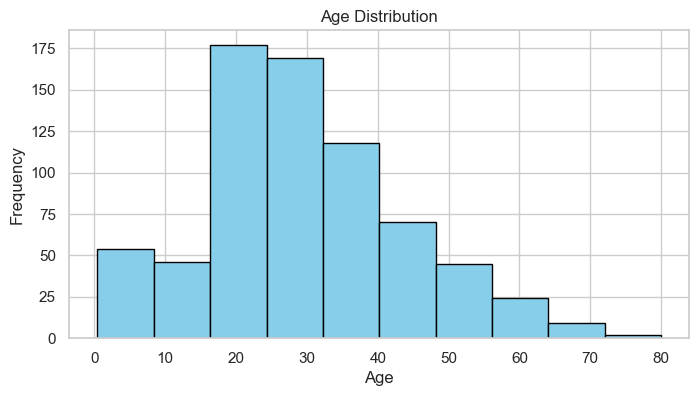

In [19]:
# %% [code]
# Histogram for Income Distribution
plt.figure(figsize=(8, 4))
# il numero di bins indica gli intervalli, cambia la frequenza, ma la probablità
# non cambia perchè la probabilità è l'area / frequenza
# Un numero di bin adeguato può svelare la distribuzione 
# Se non esplicitiamo bins sceglierà lui il taglio migliore
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

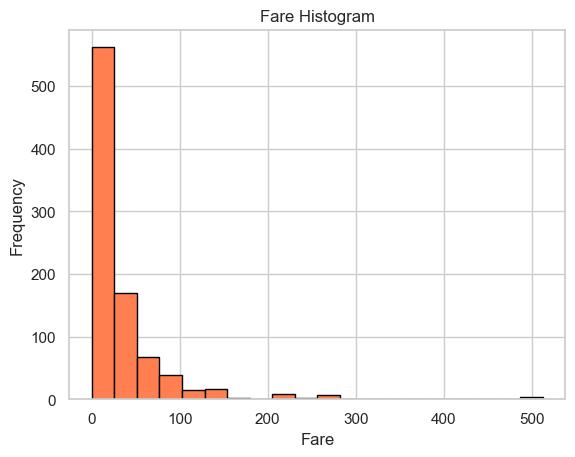

In [20]:
# %% [code]
# Pandas built-in histogram for Income
df['Fare'].plot(kind='hist', bins=20, color='coral', edgecolor='black', title='Fare Histogram')
plt.xlabel("Fare")
plt.show()

📌 Campana di Gauss e il suo uso nel Data Science

La Campana di Gauss, o Distribuzione Normale, è una curva simmetrica a forma di campana che rappresenta come si distribuiscono i dati attorno alla media.

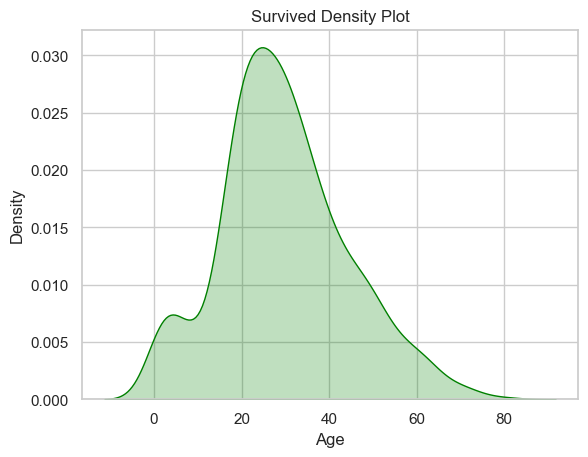

In [25]:
# %% [code]
# KDE Plot for BMI Distribution using Seaborn
# Fa un'approssimazione, non è la curva reale, la rende più morbida, infatti se lo
# paragono all'istogramma di sopra è molto più morbido e continuo
sns.kdeplot(data=df, x='Age', fill=True, color='green')
plt.title("Survived Density Plot")
plt.show()

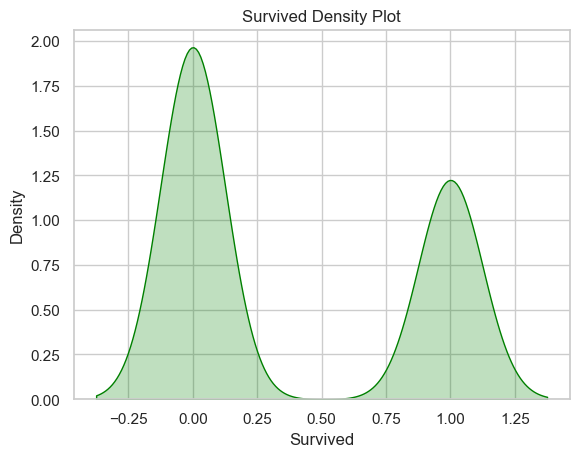

In [22]:
# %% [code]
# KDE Plot for BMI Distribution using Seaborn
# Fa un'approssimazione, non è la curva reale, la rende più morbida
sns.kdeplot(data=df, x='Survived', fill=True, color='green')
plt.title("Survived Density Plot")
plt.show()

* kde=True → Aggiunge la curva KDE (Kernel Density Estimation)
* rug=True → Aggiunge i rug plot (piccole tacche lungo l’asse X)

📊 1️⃣ KDE (Kernel Density Estimation)

📌 Cos’è il KDE?

Il KDE è una curva che stima la distribuzione dei dati in modo più fluido rispetto a un istogramma.
In pratica, aiuta a visualizzare la forma della distribuzione senza dipendere dalla suddivisione in bin dell’istogramma.

✅ Perché usarlo?
* Utile per capire se i dati seguono una distribuzione normale (Gaussiana)
* Evidenzia picchi e densità che un istogramma potrebbe non mostrare chiaramente
* Migliora l’interpretazione della distribuzione dei dati

👀 Senza kde=True → Solo istogramma
👀 Con kde=True → Istogramma + curva KDE

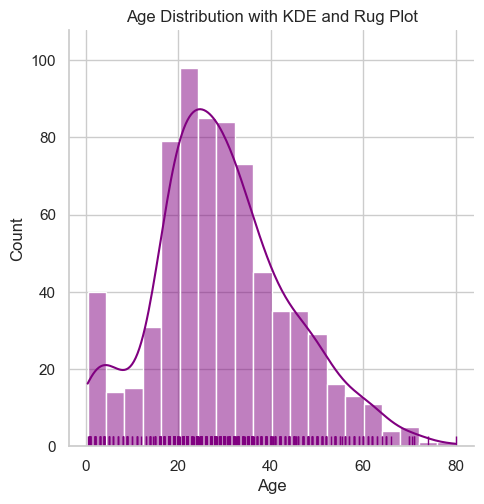

In [5]:
# Density and Rug Plot for BMI using Seaborn's displot
sns.displot(df['Age'], kde=True, rug=True, color='purple')
plt.title("Age Distribution with KDE and Rug Plot")
plt.show()

📊 1️⃣ FacetGrid

📌 Cos’è?
FacetGrid crea più sottografi (subplots) separati in base ai valori di una variabile categorica.

✅ Vantaggi:
* Permette di confrontare la distribuzione di una variabile per diverse categorie
* È utile per analizzare come una caratteristica cambia tra gruppi (es. "Fare" tra uomini e donne)

👀 Se "Sex" ha due valori (“male”, “female”), otterremo due istogrammi separati:
* Uno per "male"
* Uno per "female"

📊 2️⃣ map()

📌 Cosa fa?
g.map(sns.histplot, "Fare", bins=20, color="teal")
* Applica (map()) sns.histplot a ogni sottografo
* Usa "Fare" come variabile da plottare
* Divide i dati in 20 bin (per controllare il livello di dettaglio dell’istogramma)
* Colora i grafici in teal

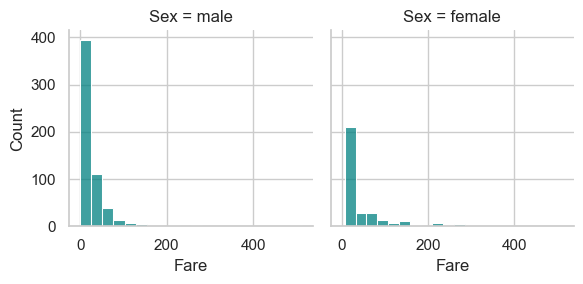

In [6]:
# %% [code]
# FacetGrid: Histogram of BMI separated by Gender
# Divide i dati in sotto-grafici (uno per ogni valore unico della colonna "Sex")
g = sns.FacetGrid(df, col="Sex")
# In ogni sotto-grafico, disegna un istogramma della colonna "Fare"
g.map(sns.histplot, "Fare", bins=20, color="teal")
plt.show()

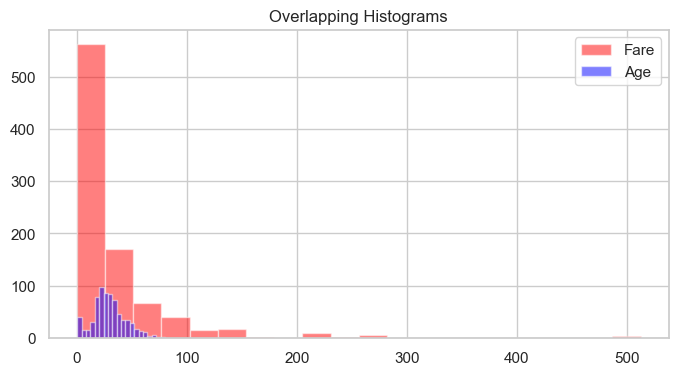

In [79]:
# Adjusting transparency (alpha) and adding labels
plt.figure(figsize=(8, 4))
plt.hist(df['Fare'], bins=20, color='red', alpha=0.5, label='Fare')
plt.hist(df['Age'], bins=20, color='blue', alpha=0.5, label='Age')
plt.title("Overlapping Histograms")
plt.legend()
plt.show()


# studio della correlazione

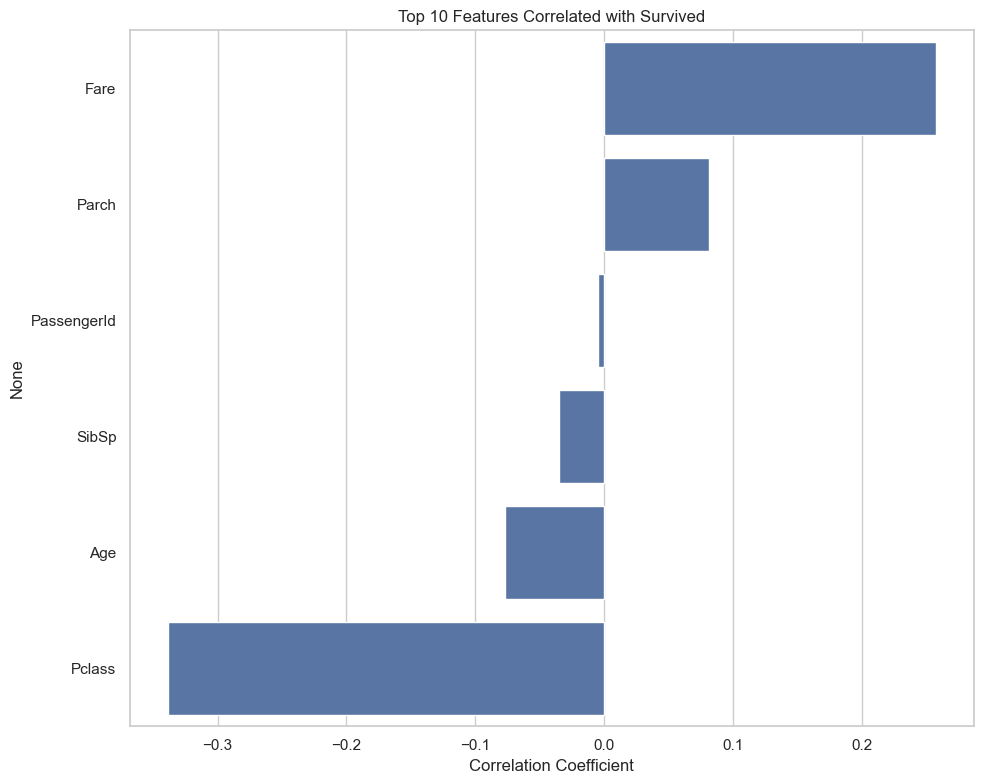

Survived        1.000 (Strong)
Fare            0.257 (Strong)
Parch           0.082 (Strong)
PassengerId    -0.005 (Strong)
SibSp          -0.035 (Strong)
Age            -0.077 (Strong)
Pclass         -0.338 (Strong)
Name: Survived, dtype: object

In [7]:
# seleziono le colonne solo numeriche escludendo i dati categorici
numeric_db = df.select_dtypes(include = ['int64', 'float64'])
# calcola la correlzione tra ogni variabile numerica e suurvived e ordina i valori in ordine decrescente
correlation = numeric_db.corr()['Survived'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:] # Esclude 'Survived' stesso
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Survived')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.005 else 'Moderate' if abs(x) > 0.003 else 'Weak'})").head(10)

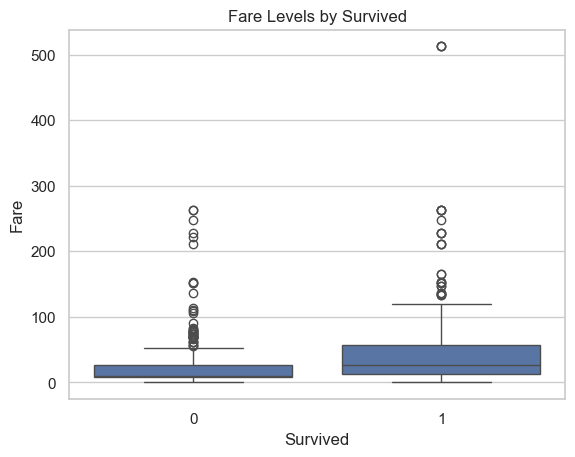

In [8]:
# %% [code]
# Box Plot: Fare levels by Age
# non sono distribuzioni ma le simulazioni
# seaborn capisce in automatico che Fare ha due valori distinti e li separa
x = "Survived"
y = "Fare"
sns.boxplot(x=x, y=y, data=df)
plt.title(f"{y} Levels by {x}")
plt.show()

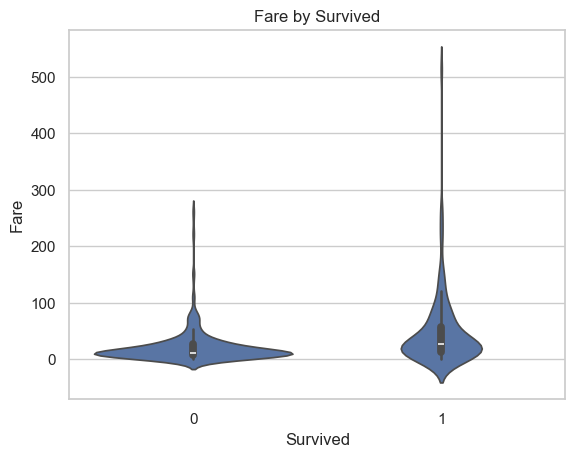

In [82]:
# %% [code]
# Violin Plot: Glucose Level by Smoking Status

x = "Survived"
y = "Fare"

sns.violinplot(x=x, y=y, data=df)
plt.title(f"{y} by {x}")
plt.show()

✅ Crea un Pairplot per visualizzare le relazioni tra le variabili numeriche selezionate:
* Variabili considerate: Age, Fare, SibSp, Pclass
* diag_kind='kde' → Usa la Kernel Density Estimation (KDE) per la distribuzione diagonale

🔍 📌 Cosa fa nello specifico?
1. Coppie di scatter plot:
    * Ogni cella mostra la relazione tra due variabili.
    * Ad esempio, la cella all’incrocio tra "Age" e "Fare" mostra uno scatter plot che indica come varia il prezzo del biglietto rispetto all’età.
2. Distribuzione diagonale:
    * La diagonale mostra la distribuzione di ogni singola variabile.
    * diag_kind='kde' imposta la curva di densità invece di un istogramma predefinito.
3. Relazioni tra variabili:
    * Scatter plot (fuori diagonale): Ogni punto rappresenta una riga del dataset.
    * Se i punti formano una linea diagonale, c’è una correlazione lineare.
    * Se sono sparsi senza schema, non c’è una relazione chiara.
      
📌 Cosa possiamo scoprire?

1.	Età vs Prezzo (Age vs Fare):
    * Se i biglietti più costosi sono associati a determinate fasce d’età.
2.	Numero di fratelli/coniugi (SibSp) vs Prezzo (Fare):
    * Chi viaggiava con più familiari pagava di più?
3.	Classe vs Prezzo (Pclass vs Fare):
    * Chi viaggiava in 1ª classe pagava ovviamente di più, ma quanto era marcata la differenza?
  
📌 Conclusione:

✔️ Pairplot = Confronto visivo tra tutte le coppie di variabili.

✔️ KDE sulla diagonale = Distribuzione delle singole variabili.

✔️ Utile per scoprire correlazioni e outlier a colpo d’occhio!

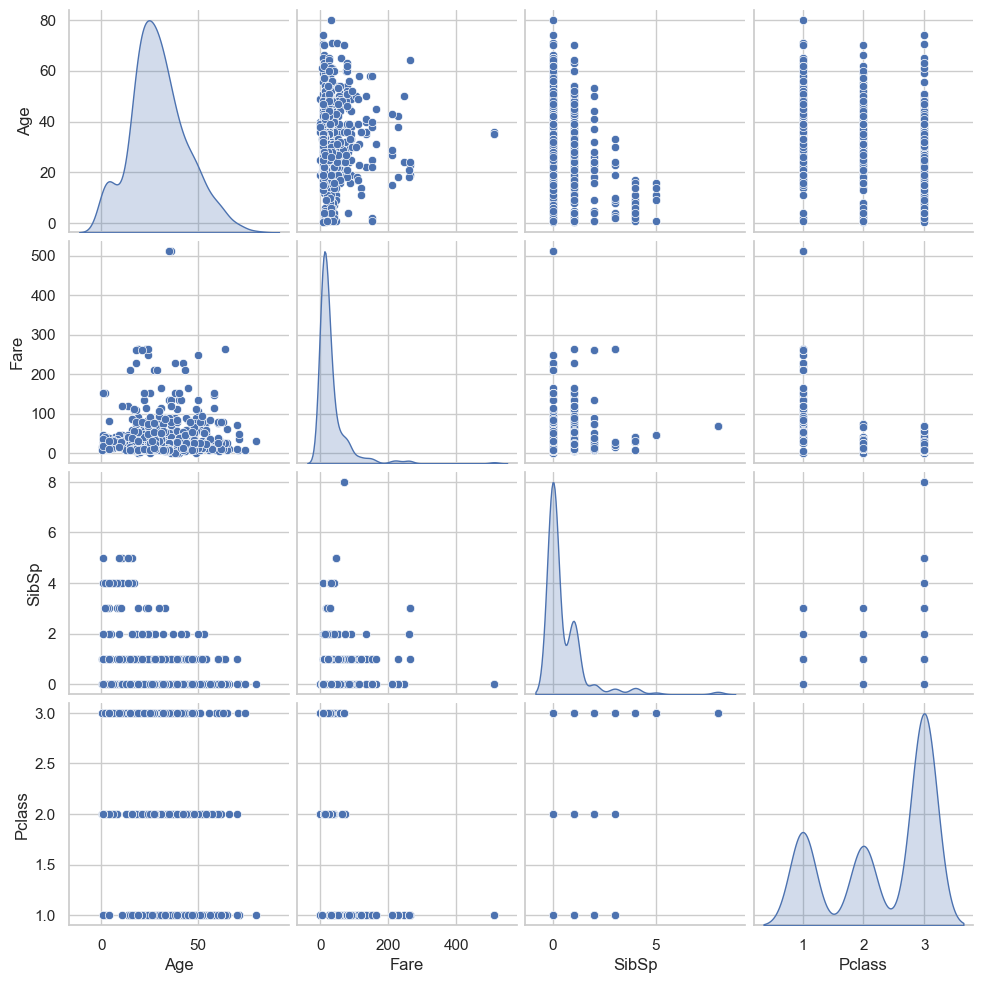

In [83]:
# %% [code]
# Pair Plot for a subset of numerical variables
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Pclass']], diag_kind='kde')
plt.show()

📊 Swarmplot è un tipo di grafico in Seaborn che distribuisce i punti lungo un asse categoriale mostrando ogni singolo dato senza sovrapposizioni.

📌 Come funziona?
1. Asse X: Categoria (es. "Sex": maschio/femmina)
2. Asse Y: Valore numerico (es. "Fare": prezzo del biglietto)
3. Posizione dei punti: Ogni punto rappresenta un singolo dato.
    * Distribuzione orizzontale per evitare la sovrapposizione
    * Densità visiva → Più punti = Maggiore concentrazione

📌 Quando usarlo?
* Se vuoi vedere la distribuzione dettagliata dei dati
* Se vuoi capire la densità senza perdere la visione dei singoli valori
* Perfetto per dataset di piccole/medie dimensioni

⚠️ Limite: Con dataset molto grandi, il grafico diventa affollato. In quel caso, meglio usare il boxplot o il violinplot.

/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


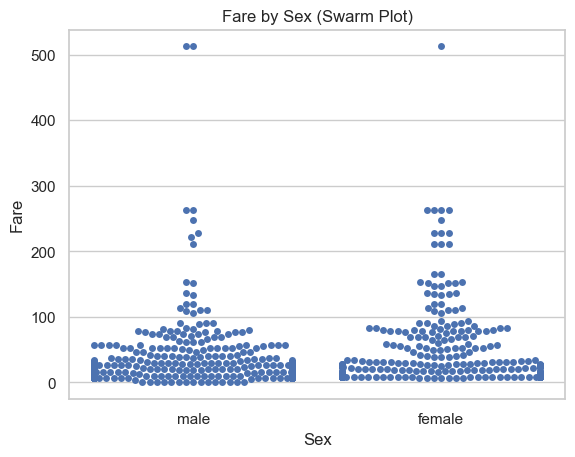

In [11]:
# %% [code]
# Swarm Plot: BMI by Gender
# posiziona tutte i punti in modo che non si accavallino
x = "Sex"
y = "Fare"
sns.swarmplot(x=x, y=y, data=df)
plt.title(f"{y} by {x} (Swarm Plot)")
plt.show()

/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_lecture_1/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds_

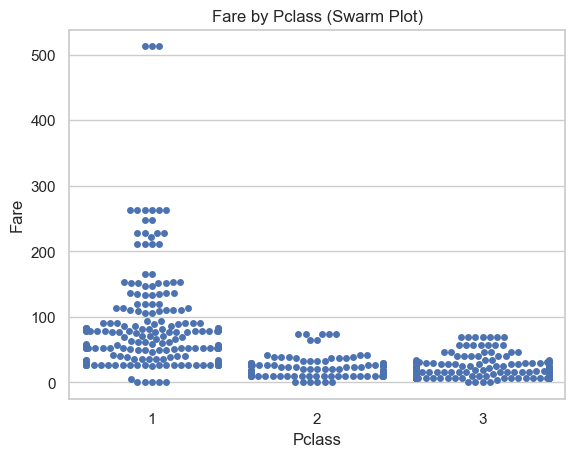

In [10]:
# %% [code]
# Swarm Plot: BMI by Gender

x = "Pclass"
y = "Fare"
sns.swarmplot(x=x, y=y, data=df)
plt.title(f"{y} by {x} (Swarm Plot)")
plt.show()

/var/folders/ct/c0klcjvj2wz7y1hkljbmmz3r0000gn/T/ipykernel_96758/1161511241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=df, palette='pastel')


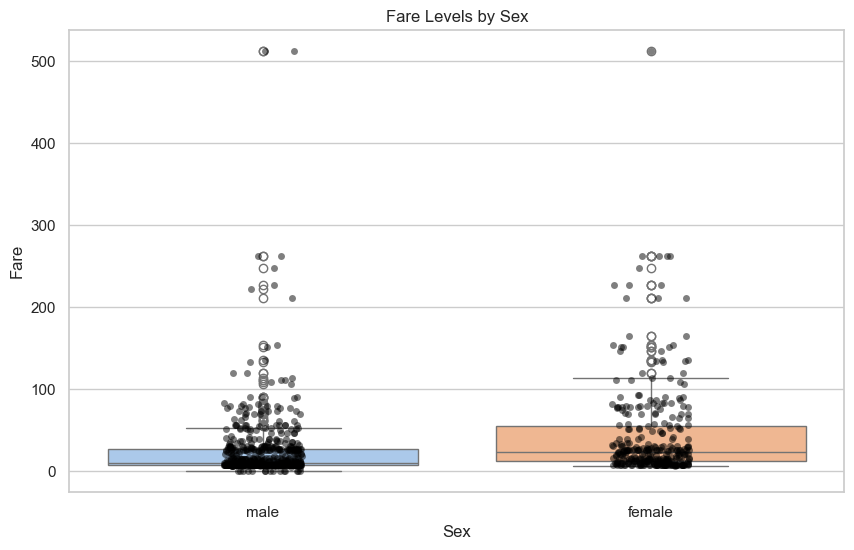

In [85]:
# %% [code]
# Combine a Box Plot and Strip Plot 
plt.figure(figsize=(10, 6))
x = "Sex"
y = "Fare"
sns.boxplot(x=x, y=y, data=df, palette='pastel')
sns.stripplot(x=x, y=y, data=df, color='black', alpha=0.5)
plt.title(f"{y} Levels by {x}")
plt.show()

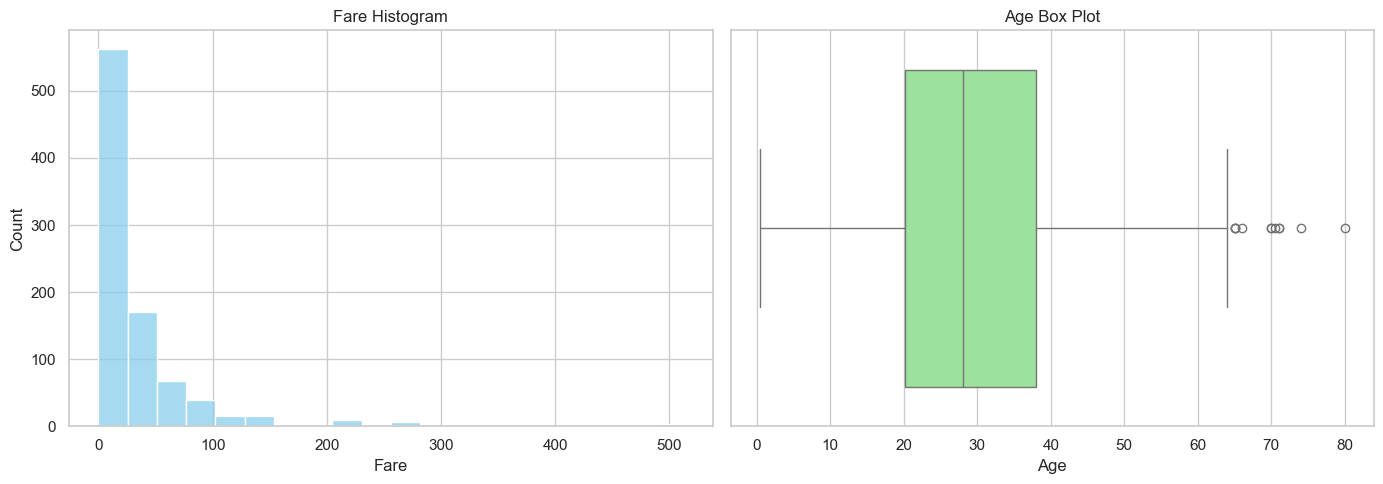

In [86]:
# Subplots: Income Histogram and Income Box Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Fare'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Fare Histogram")
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title("Age Box Plot")
plt.tight_layout()
plt.show()

Il line plot (plt.plot()) collega i punti dati con linee, mostrando come una variabile cambia rispetto a un’altra.

Asse X: Età dei passeggeri (Age)

Asse Y: Prezzo del biglietto (Fare)

Linea blu (color='b'): Connette i dati per mostrare l’andamento

📊 Cosa può mostrare?
1. Trend generale: Il prezzo aumenta con l’età?
2. Outlier: Biglietti eccezionalmente costosi per certe fasce d’età.
3. Fluttuazioni: Variazioni del prezzo tra passeggeri giovani e anziani.

⚠️ Problema con questo tipo di dati:

Il line plot è ottimo per serie temporali o dati ordinati.

👉 In questo caso, l’età non è una sequenza continua, quindi la linea collega punti senza un ordine logico.

💡 Soluzione migliore: Usa scatter plot per visualizzare meglio la distribuzione.

📌 Conclusione:
* ✅ Utile: Per dati temporali o ordinati.
* ⚠️ Non ideale: Per dati sparsi come età e prezzo del biglietto.

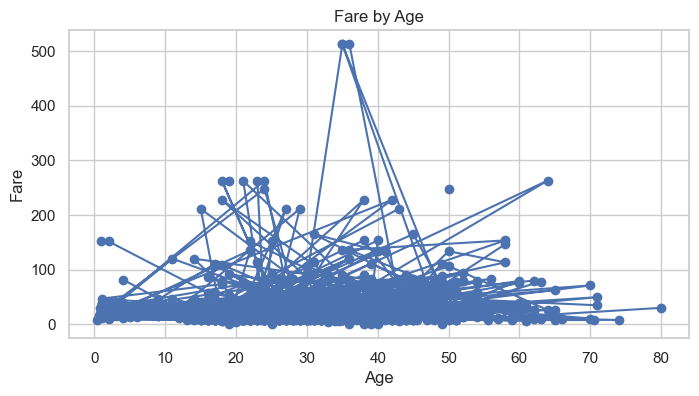

In [87]:
# %% [code]
# Line Plot: Fare vs. Age
# ogni persona è un pallino
plt.figure(figsize=(8, 4))
plt.plot(df['Age'], df['Fare'], marker='o', linestyle='-', color='b')
plt.title("Fare by Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


Lo scatter plot è un grafico che mostra la relazione tra due variabili numeriche, posizionando ogni dato come un punto su un piano cartesiano.

📌 Cosa fa?
* Asse X: Prima variabile (es. Età)
* Asse Y: Seconda variabile (es. Prezzo del biglietto)
* Ogni punto rappresenta una singola osservazione

📊 Cosa puoi scoprire?
1. Relazione: Se i punti formano una linea (positiva o negativa), c’è una correlazione.
2. Distribuzione: Vedi come i valori sono distribuiti nello spazio.
3. Outlier: Punti isolati che si discostano dal resto.

⚠️ Quando usarlo?
* ✅ Relazione tra due variabili continue
* ❌ Non per variabili categor


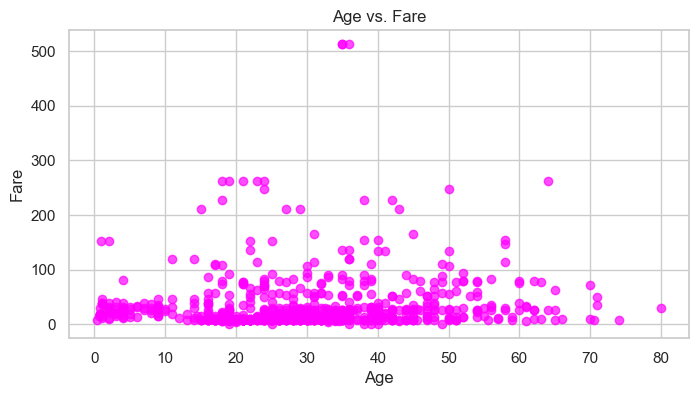

In [94]:
# Scatter Plot: Glucose Level vs. BMI
plt.figure(figsize=(8, 4))
plt.scatter(df['Age'], df['Fare'], color='magenta', alpha=0.7)
plt.title("Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

L’area plot (creato con fill_between()) è un grafico che riempie l’area sotto una curva, mostrando visivamente quanto cresce o diminuisce una variabile rispetto a un’altra.

	1.	fill_between() → Riempie l’area tra l’asse X (Age) e la curva del prezzo (Fare).
	2.	plot() → Disegna la linea principale sopra l’area colorata.
	3.	alpha=0.4 → Rende il colore semi-trasparente.

📊 Cosa mostra?
1. Trend generale: Come il prezzo (Fare) varia con l’età (Age).
2.	Intensità visiva: Più l’area è grande, più il valore è alto.
3.	Distribuzione: Le aree piatte indicano stabilità, quelle alte variazioni.

⚠️ Quando usarlo?

* ✅ Mostrare variazioni cumulative nel tempo o su una scala ordinata.
* ❌ Non ideale per dati sparsi o non ordinati (come l’età senza sorting).

📌 Conclusione:

L’area plot è utile per vedere la progressione dei valori e capire l’impatto visivo delle variazioni.

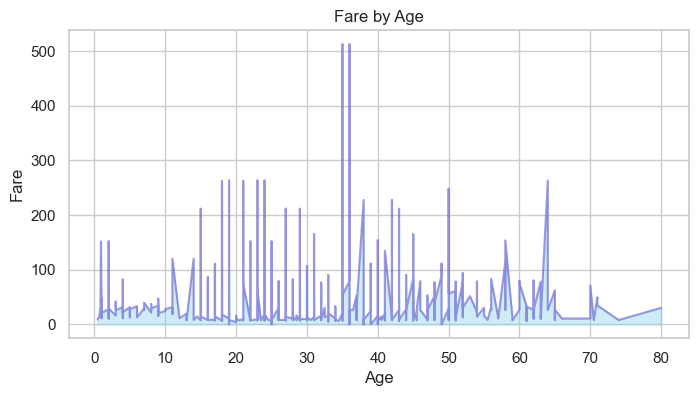

In [13]:
# %% [code]
# Area Plot: Daily Caloric Intake by Age (sorted by Age)
df["Age_in_5_years"] = df["Age"]+5

df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8, 4))
plt.fill_between(df_sorted['Age'], df_sorted['Fare'], color="skyblue", alpha=0.4)
plt.plot(df_sorted['Age'], df_sorted['Fare'], color="Slateblue", alpha=0.6)
plt.title("Fare by Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


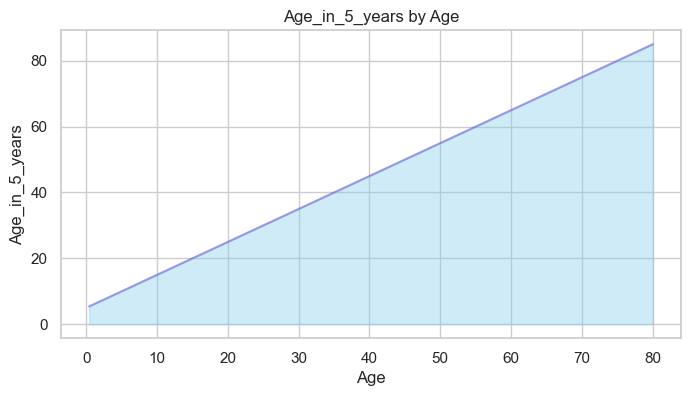

In [12]:
# %% [code]
# Area Plot: Daily Caloric Intake by Age (sorted by Age)
df["Age_in_5_years"] = df["Age"]+5

df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8, 4))
plt.fill_between(df_sorted['Age'], df_sorted['Age_in_5_years'], color="skyblue", alpha=0.4)
plt.plot(df_sorted['Age'], df_sorted['Age_in_5_years'], color="Slateblue", alpha=0.6)
plt.title("Age_in_5_years by Age")
plt.xlabel("Age")
plt.ylabel("Age_in_5_years")
plt.show()

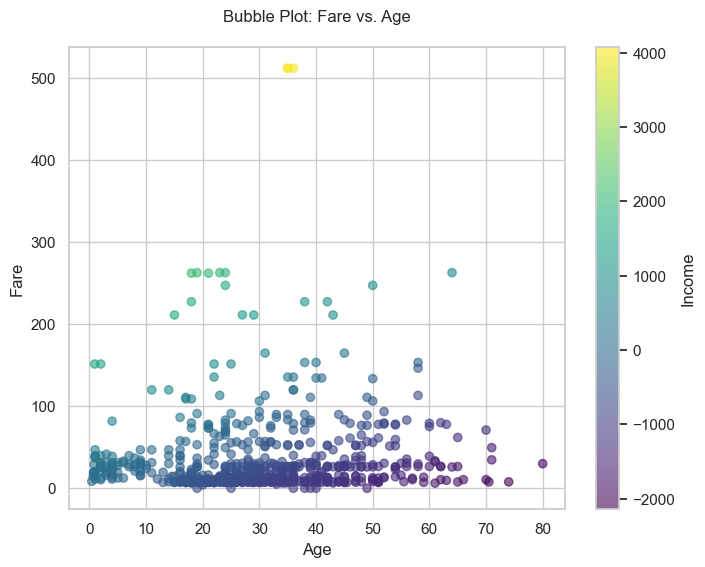

In [101]:
# %% [code]

df["Income"] = 10*df["Fare"] - 30*df["Age"] + np.random.normal(loc=0, scale=2, size=df.shape[0])
# Bubble Plot: BMI vs. Glucose Level (Bubble size represents Daily Caloric Intake, color indicates Age)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], 
            #s=df['Age'] / 10,  # Adjust marker sizes as needed
            c=df['Income'], cmap='viridis', alpha=0.6)
plt.title("Bubble Plot: Fare vs. Age\n")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label='Income')
plt.show()


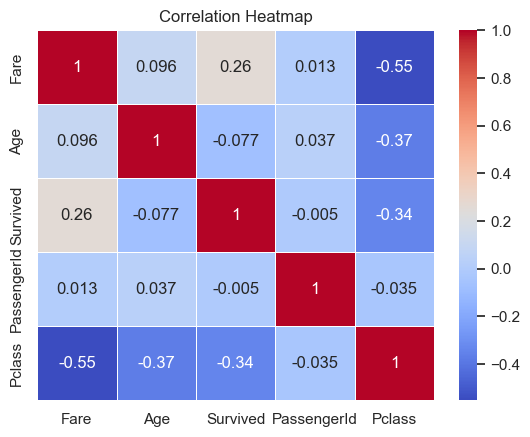

In [120]:
# Correlation Heatmap for selected numeric columns
cols = ['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

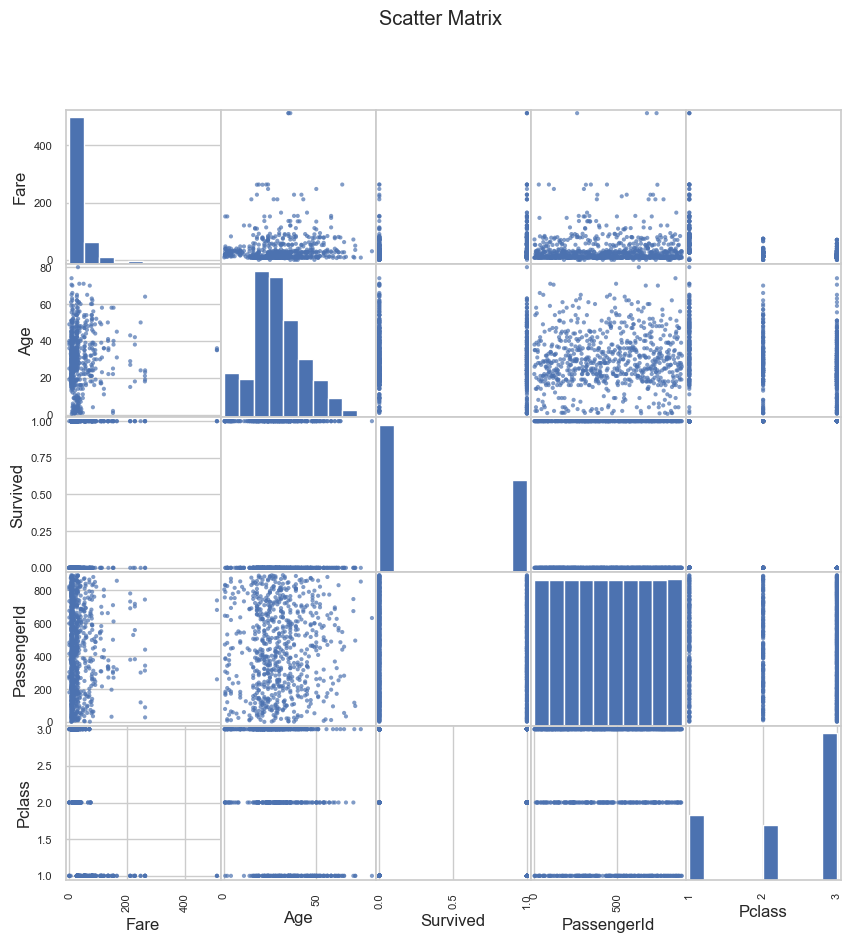

In [48]:
# Scatter Matrix (Pair Plot) for a subset of numeric columns
pd.plotting.scatter_matrix(df[['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]], figsize=(10, 10), alpha=0.7)
plt.suptitle("Scatter Matrix")
plt.show()

Il codice utilizza FacetGrid di Seaborn per creare una griglia di grafici separati, basata su una variabile categorica (Survived).
📊 Cosa mostra?
1. Confronto tra sopravvissuti e non sopravvissuti:
	* Ogni colonna rappresenta uno stato: Survived=0 e Survived=1.
2.	Distribuzione per classe:
	* I colori indicano la classe (Pclass): blu (1ª), arancione (2ª), verde (3ª).
	* Vedrai se giovani in 1ª classe avevano più probabilità di sopravvivere.
3.	Tendenze visive:
	* Se i punti sono concentrati in alto per la 3ª classe → Più passeggeri giovani.
	* Se in basso per la 1ª → Più adulti benestanti.

⚠️ Quando usarlo?

* ✅ Per confrontare distribuzioni tra sottogruppi separati.
* ❌ Non adatto per serie temporali o numerosi valori distinti.

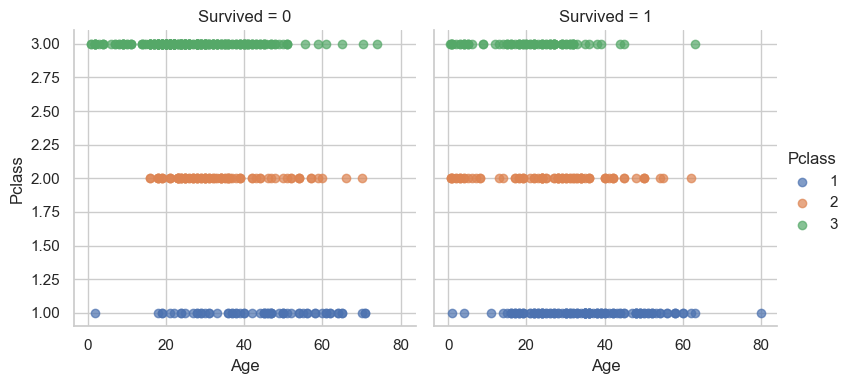

In [54]:
# Facet Grid: Scatter plot of BMI vs. Cholesterol separated by Gender and colored by Smoking Status
g = sns.FacetGrid(df, col="Survived", hue="Pclass", height=4)
g.map(plt.scatter, "Age", "Pclass", alpha=0.7)
g.add_legend()
plt.show()

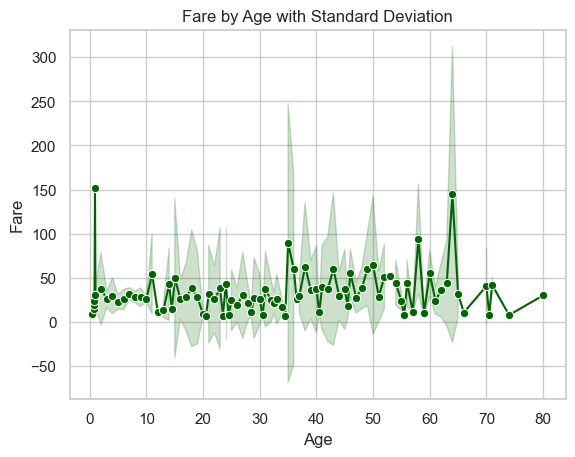

In [107]:
# Line Plot with Error Bars: Fare by Age (with confidence interval using Seaborn)
sns.lineplot(x='Age', y='Fare', data=df, errorbar='sd', marker='o', color='darkgreen')
plt.title("Fare by Age with Standard Deviation")
plt.show()

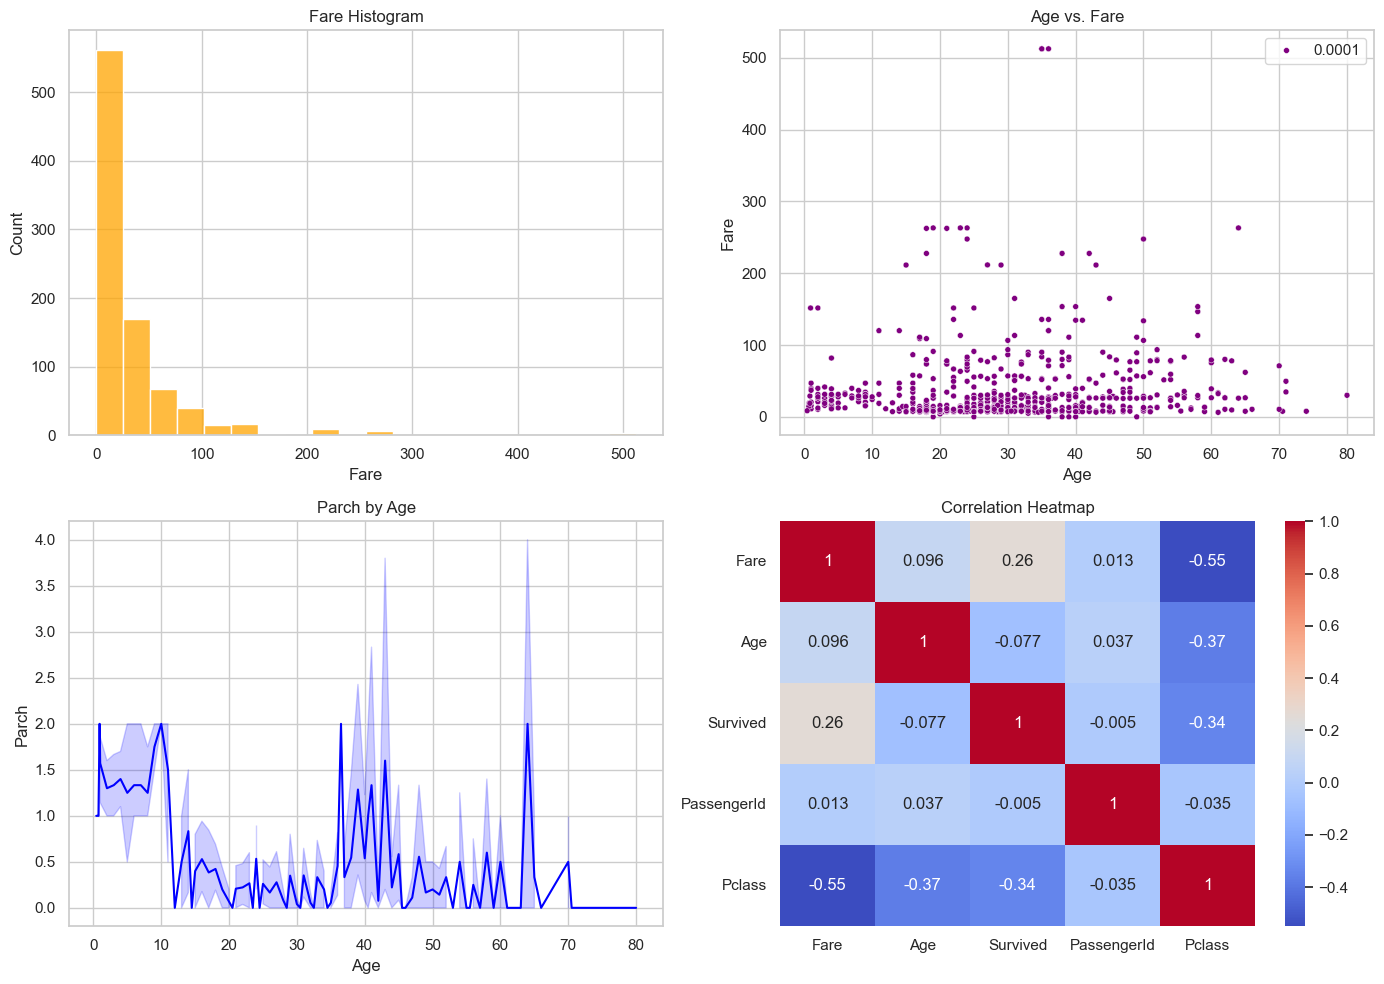

In [121]:
# Subplots: Combining different visualizations in one figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Fare'], bins=20, ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Fare Histogram")
sns.scatterplot(x='Age', y='Fare', data=df, ax=axes[0, 1], color='purple', size=0.0001)
axes[0, 1].set_title("Age vs. Fare")
sns.lineplot(x='Age', y='Parch', data=df, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Parch by Age")
sns.heatmap(corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Questo codice crea un line plot che mostra il prezzo del biglietto (Fare) rispetto all’età (Age) e evidenzia un picco anomalo tramite un’annotazione.

* Crea un grafico a linea con punti (marker='o') che mostra il prezzo del biglietto (Fare) in base all’età (Age).
* I dati sono ordinati per età per rendere il grafico più leggibile.
* Il colore rosso evidenzia la linea.

2.	Annotazione del picco:
* Trova il primo passeggero (iloc[0]) con un biglietto superiore al 90° percentile del prezzo (quantile(0.9)), considerato un “picco anomalo”.

* annotate() aggiunge l’etichetta "Notable Spike" al punto specifico:
	* xy → Posizione del punto da annotare (Age e Fare del picco).
	* xytext → Posizione del testo dell’annotazione, leggermente spostata.
	* arrowprops → Disegna una freccia nera che collega il testo al punto:
    	* facecolor='black' → Freccia nera
    	* shrink=0.05 → Riduce leggermente la lunghezza della freccia

📊 Cosa mostra il grafico?
1. Linea rossa: Prezzo del biglietto per ogni età.
2. Punto annotato: Un picco anomalo di prezzo (biglietto molto costoso rispetto agli altri).
3. Freccia e testo: L’etichetta "Notable Spike" spiega il picco.

⚠️ Quando usarlo?

* ✅ Per evidenziare punti chiave come outlier, eventi importanti o soglie superate.
* ❌ Non utile per grandi dataset con molte anomalie.

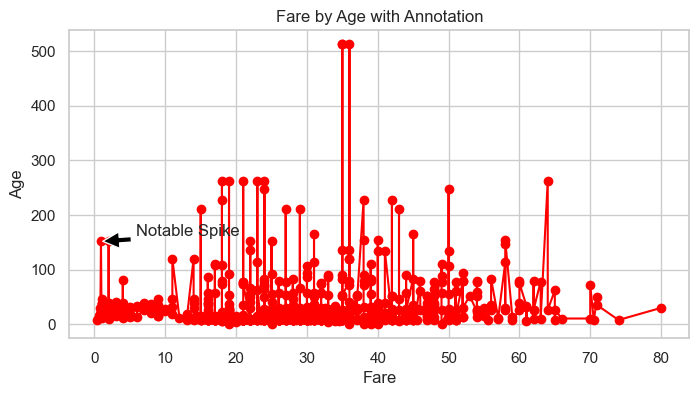

In [122]:
# Annotation Example: Fare by Age with a notable spike annotated
plt.figure(figsize=(8, 4))
df_sort = df.sort_values("Age")
plt.plot(df_sort['Age'], df_sort['Fare'], marker='o', color='red')
plt.title("Fare by Age with Annotation")
plt.xlabel("Fare")
plt.ylabel("Age")
# For the purpose of this demo, annotate the first occurrence where Fare is above a threshold
# Trova il primo passeggero (iloc[0]) con un biglietto superiore al 90° percentile del prezzo 
# (quantile(0.9)), considerato un “picco anomalo”.
spike = df_sort[df_sort['Fare'] > df_sort['Fare'].quantile(0.9)].iloc[0]
plt.annotate('Notable Spike', xy=(spike['Age'], spike['Fare']),
             xytext=(spike['Age']+5, spike['Fare']+10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Break1:

1)Given the dataframe attached "df1.csv", what is the distribution of "y"?

2)Given the dataframe attached "df2.csv", which columns contributed to creating the column "f"?

In [14]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [15]:
x = np.linspace(-10, 10, 100)
np.sin(x) * np.exp(-0.1 * x**2)

array([ 2.46985202e-05,  2.46928038e-05,  1.70704308e-05, -4.53467363e-06,
       -4.94022501e-05, -1.30226284e-04, -2.63259464e-04, -4.67778039e-04,
       -7.64449298e-04, -1.17211625e-03, -1.70250697e-03, -2.35247093e-03,
       -3.09358553e-03, -3.85940015e-03, -4.53121004e-03, -4.92406113e-03,
       -4.77561221e-03, -3.74139414e-03, -1.40071563e-03,  2.72227366e-03,
        9.11830442e-03,  1.82308449e-02,  3.03719635e-02,  4.56196879e-02,
        6.37048425e-02,  8.39002197e-02,  1.04929427e-01,  1.24915914e-01,
        1.41393477e-01,  1.51397038e-01,  1.51646138e-01,  1.38823271e-01,
        1.09935651e-01,  6.27336371e-02, -3.85597535e-03, -8.93356106e-02,
       -1.91341752e-01, -3.05507647e-01, -4.25531775e-01, -5.43479965e-01,
       -6.50321438e-01, -7.36667072e-01, -7.93646300e-01, -8.13832289e-01,
       -7.92108288e-01, -7.26364946e-01, -6.17930836e-01, -4.71665822e-01,
       -2.95686092e-01, -1.00735587e-01,  1.00735587e-01,  2.95686092e-01,
        4.71665822e-01,  

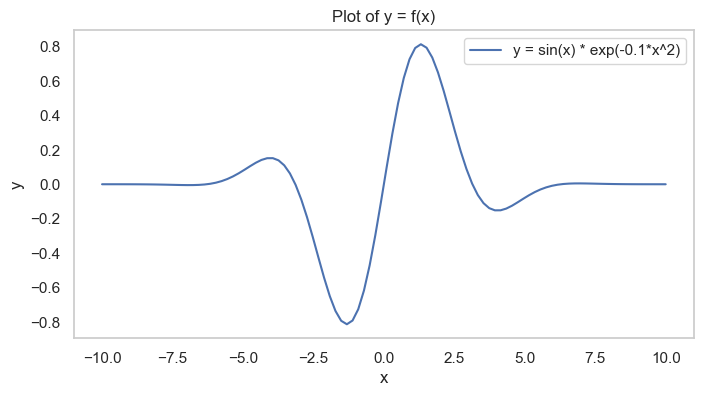

In [16]:
# Generate x values
# dividiamo l'asse x da -10 a 10 con 100 punti
x = np.linspace(-10, 10, 100)
# Define a function y = f(x)
y = np.sin(x) * np.exp(-0.1 * x**2)

# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = sin(x) * exp(-0.1*x^2)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()

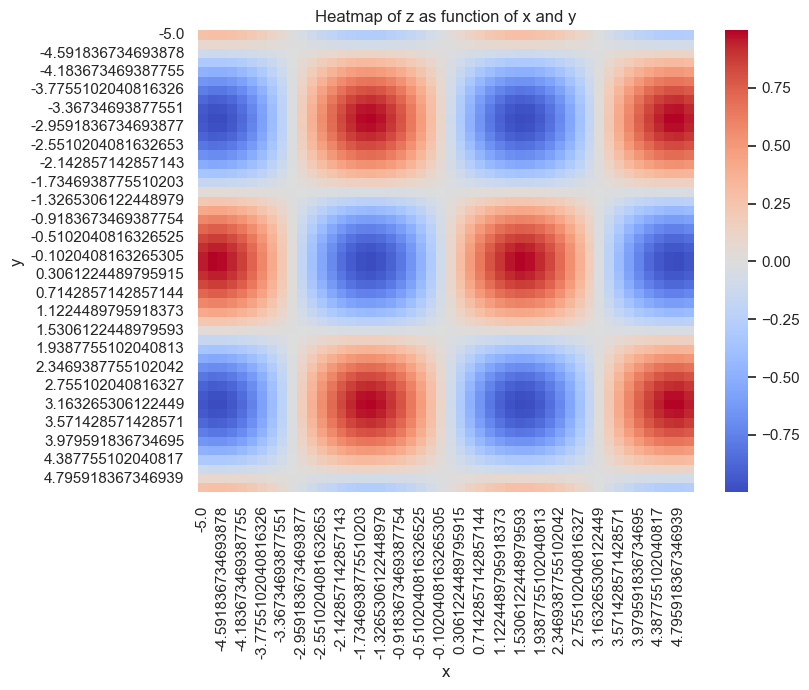

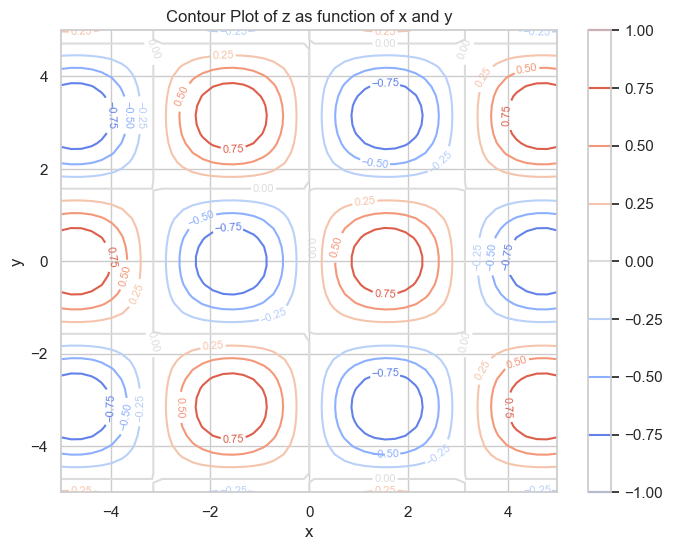

In [19]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
# crea una griglia di valori x e y
# np.meshgrid: Crea una griglia bidimensionale, combinando ogni coppia (x, y).
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) * np.cos(Y)  # Example function

# Convert to DataFrame
# ravel(): Appiattisce le matrici X, Y e Z in liste unidimensionali.
# pivot(): Trasforma il DataFrame per creare una tabella pivot con: index='y' → Asse Y, columns='x' → Asse X, values='z' → Valori Z
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# curve di livello, combinazione di x e y che portano a un valore specifico
# Plot contour 
# Ogni linea chiusa indica una zona con lo stesso valore di Z.
# Linee ravvicinate → Cambiamenti rapidi, linee distanti → variazioni lievi.
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

Questo codice crea una serie temporale sintetica di 10 anni (120 mesi), combinando:
1. 📈 Trend: Un aumento lineare costante.
2.	🔁 Stagionalità: Fluttuazioni che si ripetono ogni anno.
3.	📊 Rumore: Variazioni casuali per simulare dati reali.

Alla fine, ottieni un DataFrame con colonne che mostrano ogni componente.


Ottieni un DataFrame con queste colonne:
* 🕰️ Date → L’asse temporale (da gennaio 2020 a dicembre 2029).
* 📊 Value → Il risultato finale (trend + stagionalità + rumore).
* 🔁 seasonality → Il ciclo annuale.
* 📈 trend → La crescita lineare.
* 📉 noise → Le variazioni casuali.

👉 set_index('Date') imposta la colonna Date come indice per analisi temporali.

In [22]:
years = 10
periods = years*12
# creo un range di date con frequenza mensili dalla data di partenza usando 120 mesi
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='M')

# Create a synthetic time series with trend and seasonality
# Ogni mese il valore aumenta leggermente. 👉 Simula una crescita costante nel tempo.
trend = np.linspace(10, 50, periods)  # Linear trend
#trend[45] = trend[45]-20
# si ripete ogni anno., np.sin() → Crea una sinusoide, cioè un’onda che si ripete ogni 12 mesi.
# 10 * → Scala l’ampiezza del ciclo a ±10 unità.
# np.tile(..., years) → Ripete l’andamento per 10 anni.
# 👉 Ogni anno il valore sale e scende, simulando stagioni o cicli economici.
seasonality = np.tile(10 * np.sin(np.linspace(0, 2 * np.pi, 12)), years)  # Seasonal component

# rumore casuale, np.random.normal → Genera numeri casuali con distribuzione normale.
# scale=3 → Variazione media di ±3 attorno al valore reale.
# 👉 Simula le fluttuazioni imprevedibili, come variazioni giornaliere delle vendite.
noise = np.random.normal(scale=3, size=periods)  # Random noise

# Combina tutti i componenti, ogni punto è la somma di Trend, stagionalità, Noise
time_series = trend + seasonality + noise

# Create a DataFrame
ts_df = pd.DataFrame({'Date': date_range, 'Value': time_series,
                      "seasonality": seasonality, "trend": trend, "noise": noise})
ts_df.set_index('Date', inplace=True)

In [23]:
ts_df.head()

,Value,seasonality,trend,noise
Date,,,,
2020-01-31,8.666795,0.000000,10.000000,-1.333205
2020-02-29,12.305183,5.406408,10.336134,-3.437360
2020-03-31,17.976527,9.096320,10.672269,-1.792062
2020-04-30,23.917113,9.898214,11.008403,3.010495
2020-05-31,20.047404,7.557496,11.344538,1.145370


Questo codice utilizza la stagionalità scomposizione (seasonal decomposition) per separare la serie temporale nei suoi principali componenti:
* Serie Originale (Value): I dati totali (trend + stagionalità + rumore).
* Trend: L’andamento a lungo termine (crescita o calo costante).
* Stagionalità: I cicli regolari che si ripetono (es. variazione mensile o stagionale).
* Residui: La parte imprevedibile non spiegata dal trend o dalla stagionalità (rumore).

🔍 Cosa fa il codice passo per passo?
* seasonal_decompose() è una funzione di statsmodels che scompone la serie.
* model='additive': Assume che la serie sia la somma di trend, stagionalità e residui:

$$\text{{Value}} = \text{{Trend}} + \text{{Seasonality}} + \text{{Residuals}}$$

* period=12: Indica che il ciclo stagionale si ripete ogni 12 mesi.

👉 Se il ciclo fosse moltiplicativo (es. variazioni %), useresti model='multiplicative'.


📊 Come leggere i risultati?
1. Serie originale: Fluttuazioni complete dei dati.
2. Trend: Se la linea sale o scende indica crescita o declino costanti.
3. Stagionalità: Ciclo che si ripete ogni anno.
4. Residui: Se il rumore è casuale e vicino a zero, il modello è affidabile.

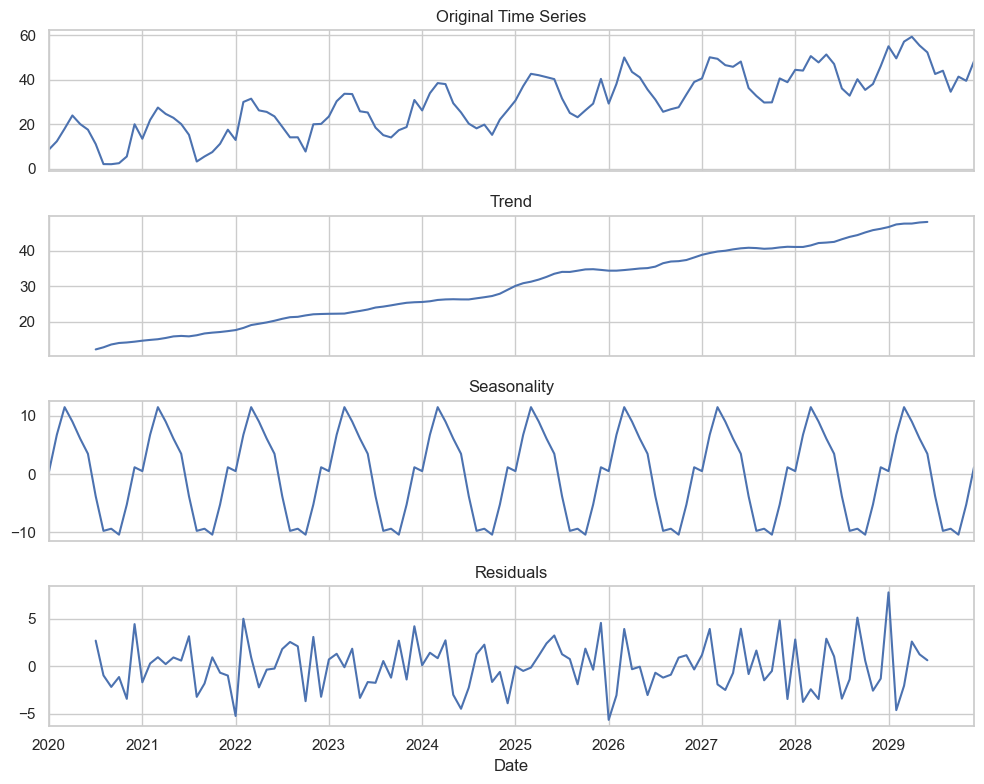

In [24]:
# Apply seasonal decomposition
result = seasonal_decompose(ts_df['Value'], model='additive', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
# 👉 Mostra l’andamento completo (con trend, cicli e rumore).
ts_df['Value'].plot(ax=axes[0], title='Original Time Series')
# 👉 Mostra la crescita costante filtrando la stagionalità e il rumore.
result.trend.plot(ax=axes[1], title='Trend')
# 👉 Mostra il ciclo mensile ripetuto, come l’oscillazione delle vendite ogni anno.
result.seasonal.plot(ax=axes[2], title='Seasonality')

#👉 Mostra la parte casuale non spiegata da trend o stagionalità.
# 👉 Valori vicini a zero indicano un buon adattamento del modello.
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

I residui si devono distribuire in modo gaussiano

<Axes: xlabel='Date'>

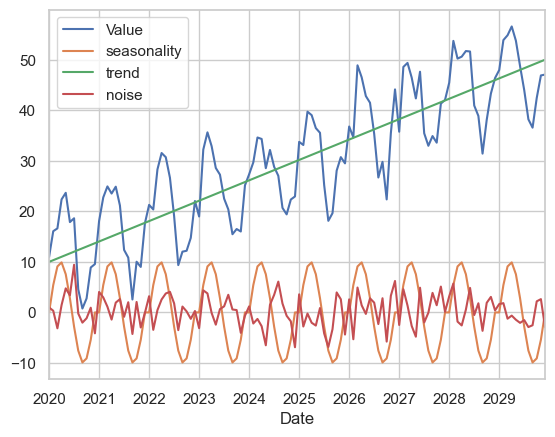

In [50]:
ts_df.plot()

Provo con dei valori estremi

In [25]:
years = 100
periods = years*12
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='M')

# Create a synthetic time series with trend and seasonality
trend = np.linspace(10, 50, periods)  # Linear trend
#trend[45] = trend[45]-20
seasonality = np.tile(1+0.5* np.sin(np.linspace(0, 2 * np.pi, 12)), years)  # Seasonal component
noise = np.random.normal(scale=3, size=periods)  # Random noise
time_series = trend * seasonality + noise

# Create a DataFrame
ts_df = pd.DataFrame({'Date': date_range, 'Value': time_series,
                      "seasonality": seasonality, "trend": trend, "noise": noise})
ts_df.set_index('Date', inplace=True)

In [26]:
np.tile(10 * np.sin(np.linspace(0, 2 * np.pi, 12)), years)

array([ 0.00000000e+00,  5.40640817e+00,  9.09631995e+00, ...,
       -9.09631995e+00, -5.40640817e+00, -2.44929360e-15])

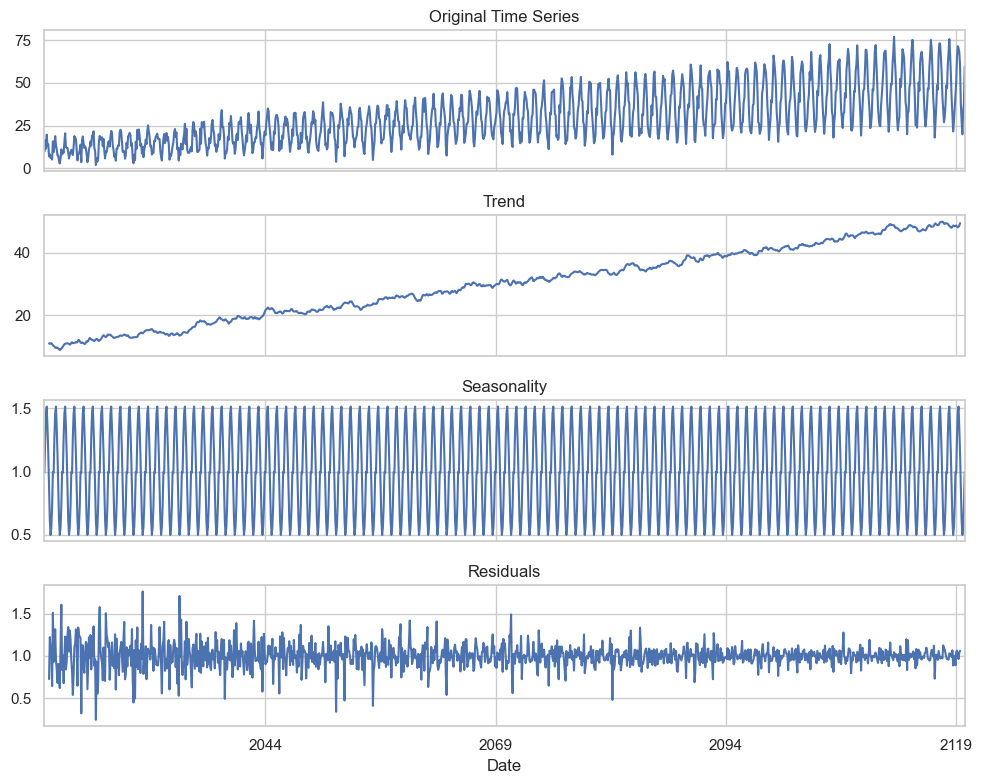

In [27]:
# Apply seasonal decomposition
result = seasonal_decompose(ts_df['Value'], model='multiplicative', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ts_df['Value'].plot(ax=axes[0], title='Original Time Series')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonality')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

# ST = T + S + R
# ST = T*S+R

In [28]:
ts_df

,Value,seasonality,trend,noise
Date,,,,
2020-01-31,9.745849,1.000000,10.000000,-0.254151
2020-02-29,16.536107,1.270320,10.033361,3.790524
2020-03-31,11.464125,1.454816,10.066722,-3.181104
2020-04-30,19.669104,1.494911,10.100083,4.570381
2020-05-31,13.020051,1.377875,10.133445,-0.942567
...,...,...,...,...
2119-08-31,27.907900,0.622125,49.866555,-3.115342
2119-09-30,19.940345,0.505089,49.899917,-5.263568
2119-10-31,33.259908,0.545184,49.933278,6.037084


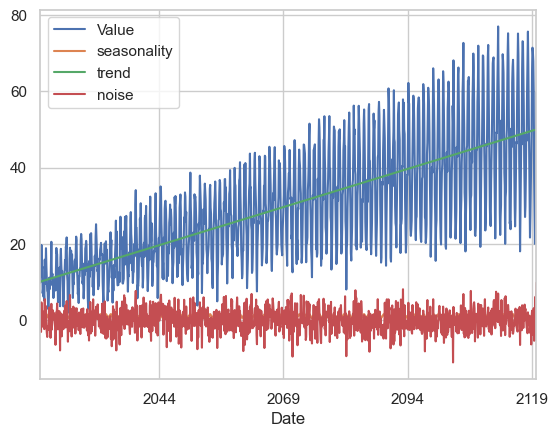

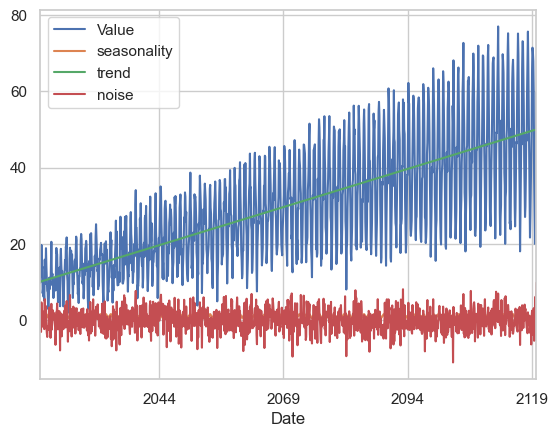

In [33]:
ts_df.plot()
plt.show()

# Break2:

1)Plot the function y = log(x), how can you improve its plot in critical areas?

2)Recreate the following heatmaps:

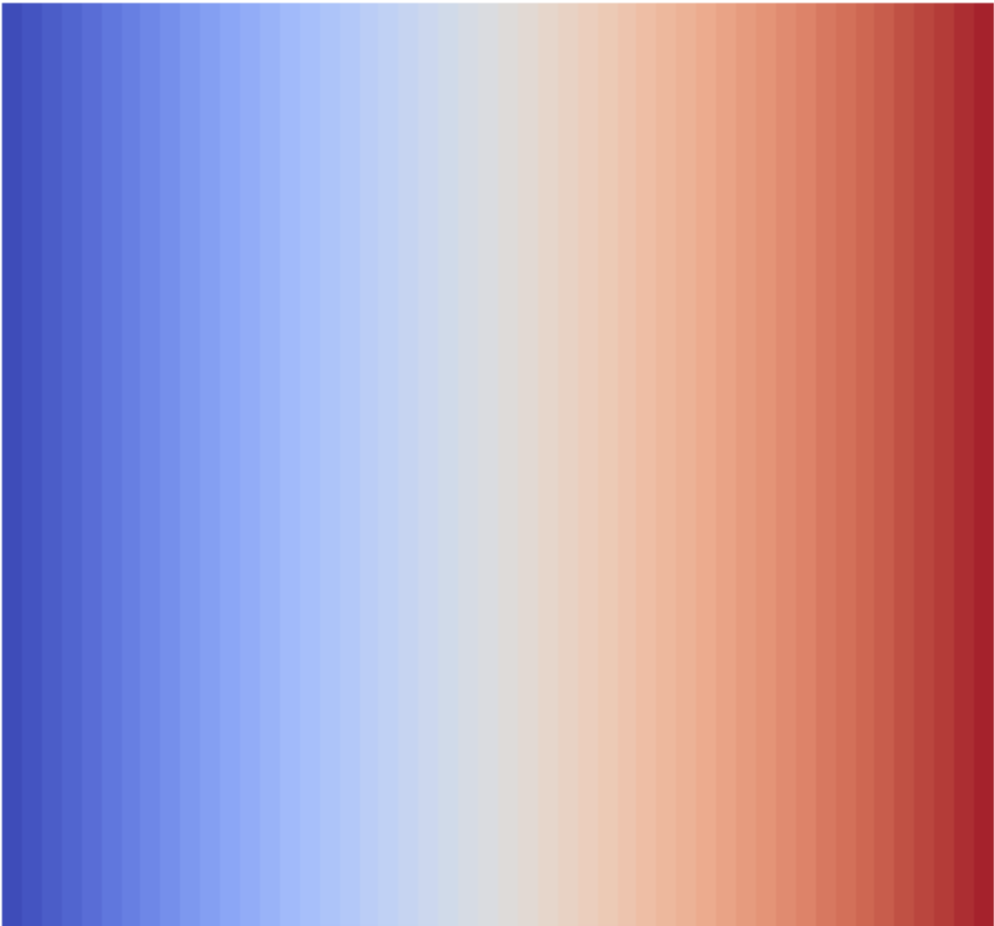,
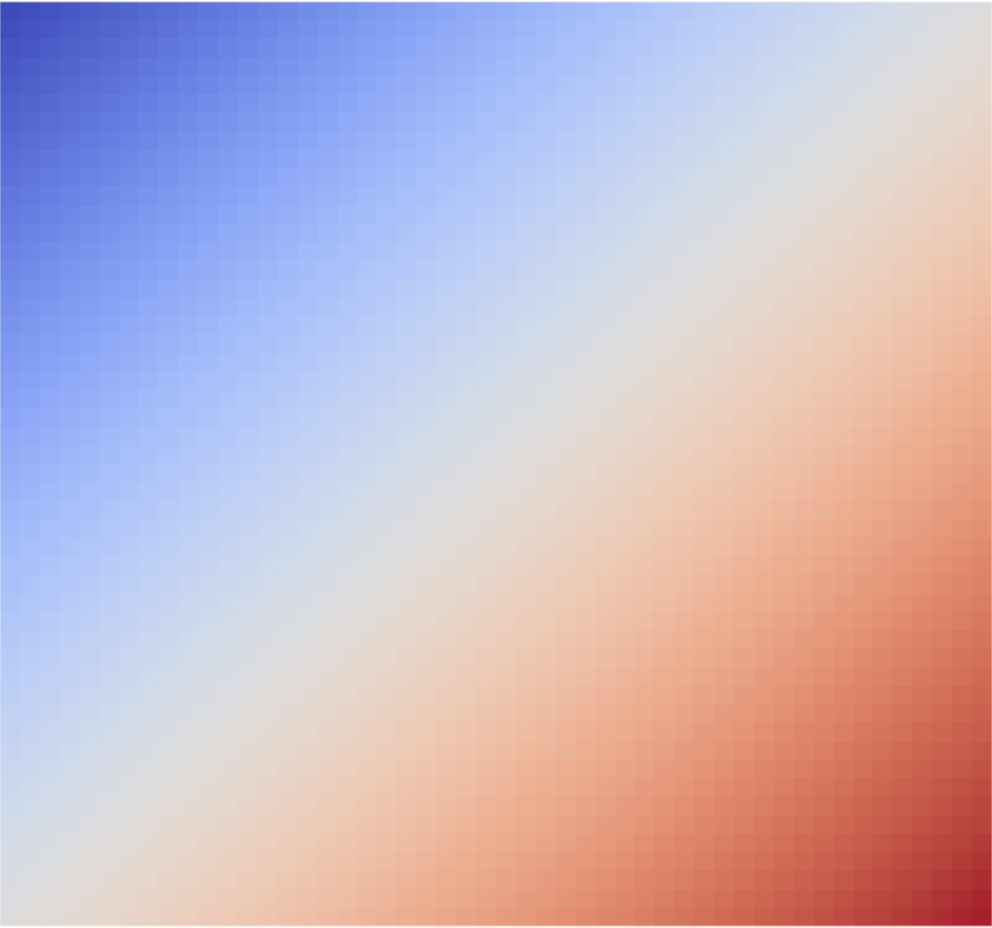,

# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the following heatmaps:

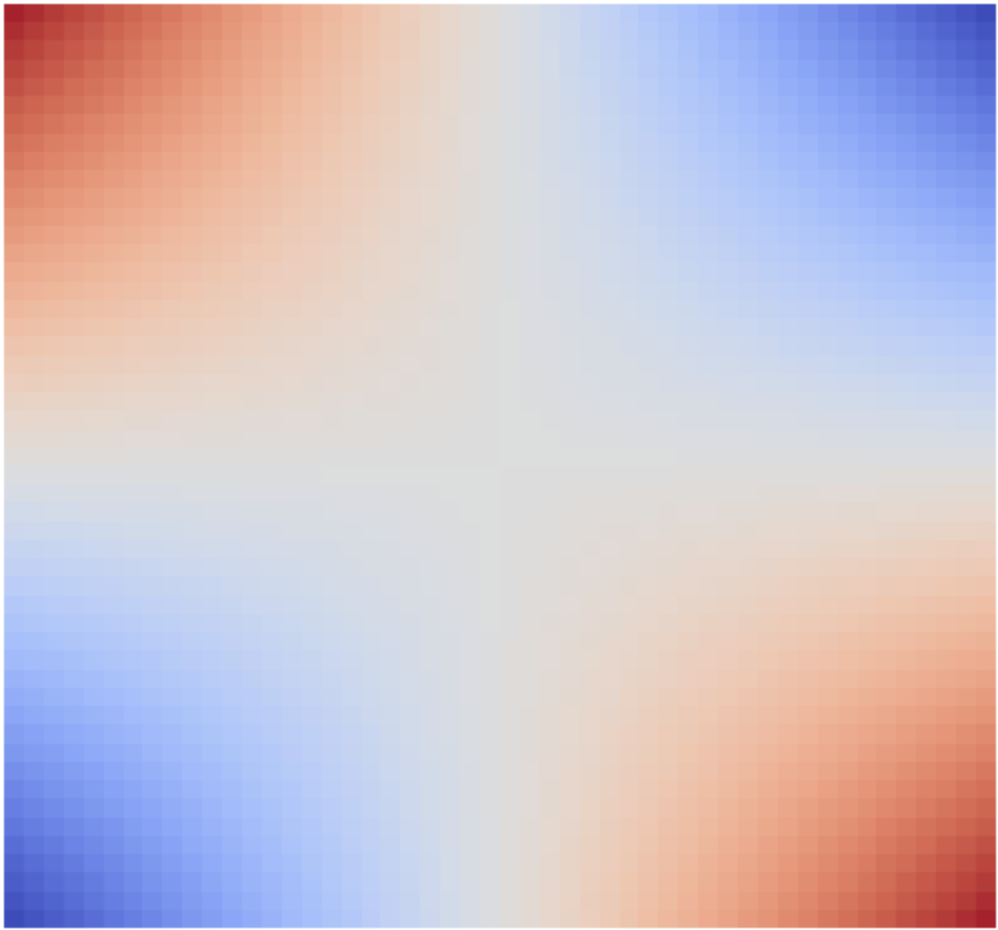,
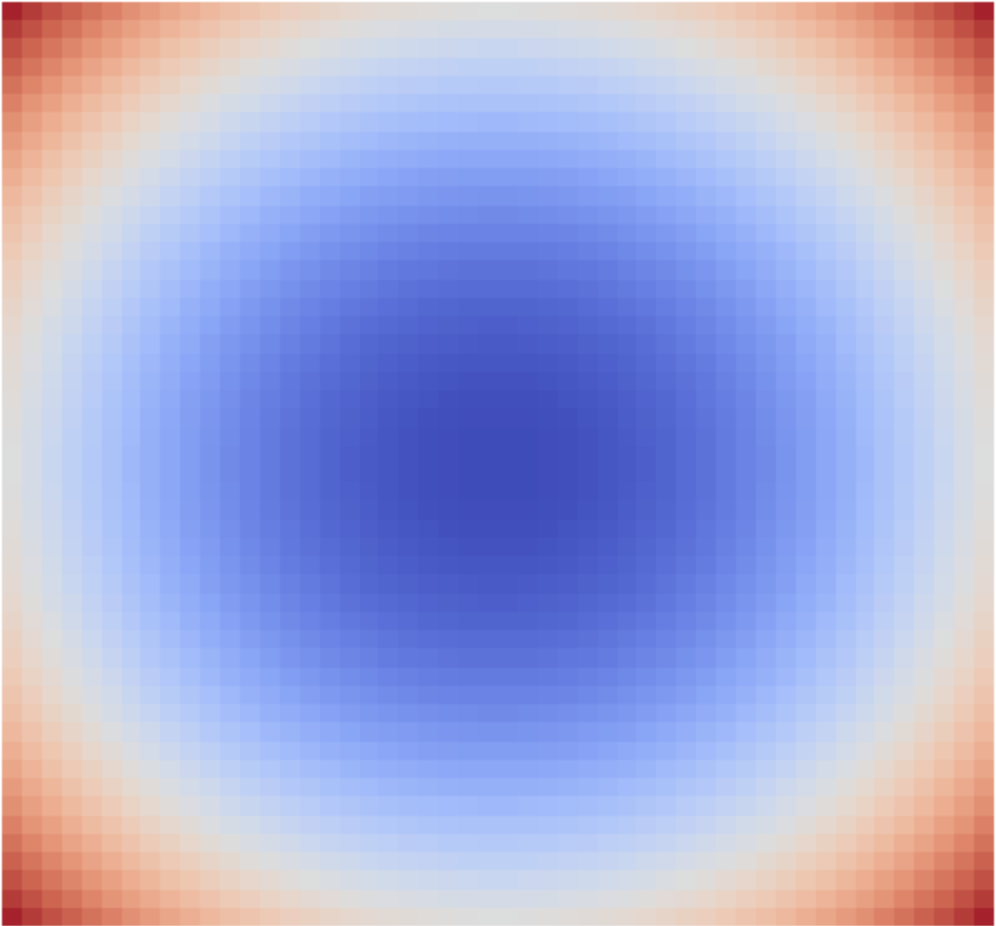,
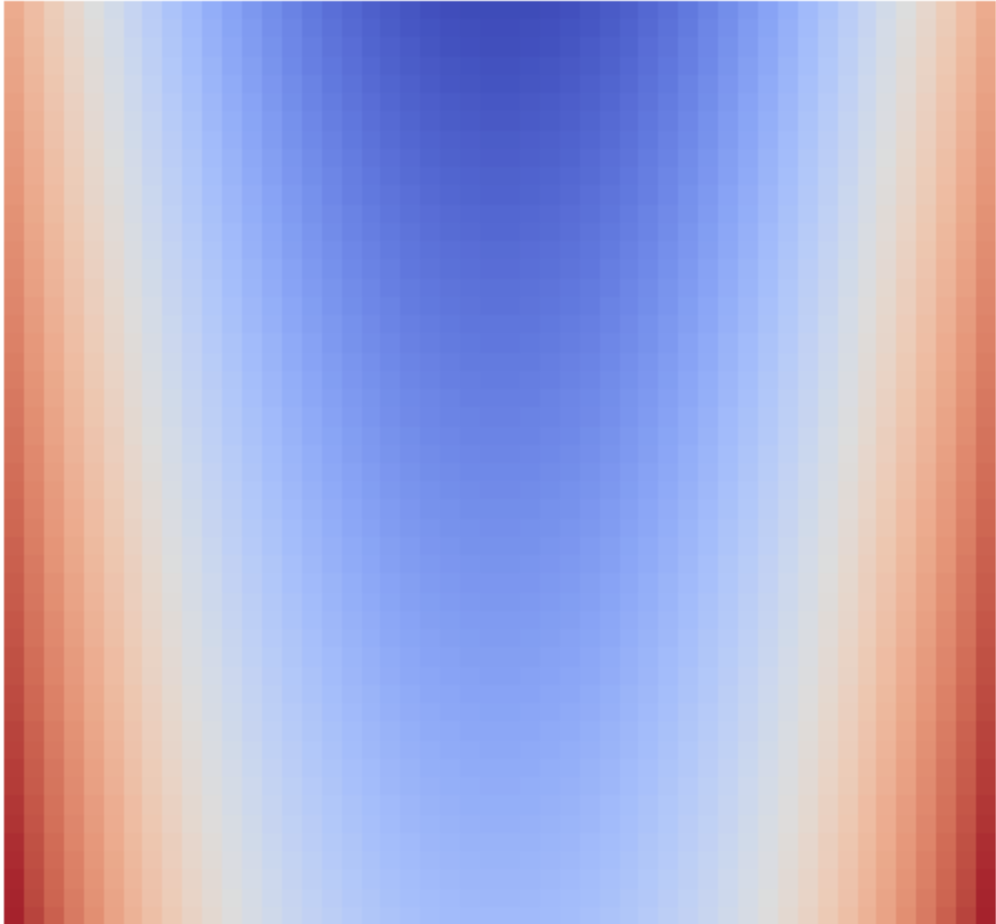